# Pareto

In [73]:
from scipy.stats import pareto
pareto.rvs(0.5,
                        loc=0,
                        scale=1,
                        size=50,
                        random_state=None,
                    )*100

array([1.85347817e+02, 1.05033880e+02, 2.34802525e+03, 1.45784683e+02,
       1.02944513e+02, 3.62975930e+03, 2.23559980e+03, 3.20404495e+02,
       1.54971648e+02, 3.57275985e+02, 1.77522349e+02, 1.05759616e+03,
       1.39795634e+02, 4.66450597e+02, 1.98296310e+02, 1.56288506e+03,
       6.57307311e+02, 2.25741705e+02, 4.93047286e+02, 1.42690261e+02,
       1.33882649e+02, 1.06899677e+02, 6.15640315e+02, 1.82430386e+03,
       3.28044409e+02, 1.57550906e+02, 4.20637137e+02, 2.37889031e+03,
       1.82537336e+02, 9.17037534e+02, 1.44006804e+03, 1.27250264e+02,
       3.92073650e+02, 3.96589127e+04, 6.00403934e+02, 1.97043495e+02,
       1.14338720e+03, 4.20060846e+02, 7.55616597e+02, 1.44562022e+02,
       2.69618412e+04, 3.27473816e+02, 3.54472153e+03, 1.26604089e+04,
       1.18409109e+02, 7.09563436e+02, 7.36947121e+02, 5.00827084e+06,
       1.71119223e+02, 1.03585075e+02])

# building of the shocks with normal law for the relative changes / returns
it means the returns are stationary but not deposits process which is a pure random walk log normal

In [3]:
from scipy import stats
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
# define middle of the list of banks
deposits = np.random.rand(int(1e5))*500
plt.hist(deposits)
N_max = len(deposits) - len(deposits) % 2  # can not apply a shock on
# one bank if odd nb
N_half = int(len(deposits) / 2)

In [ ]:
rho_1 = stats.truncnorm(
            (norm_lower - mu) / vol, (norm_upper - mu) / vol, loc=mu, scale=vol
        ).rvs(N_half)

In [ ]:
vol = 0.3
mu=0
norm_lower=-1
norm_upper=0

rho_1 = stats.truncnorm(
        (norm_lower - mu) / vol,
        (norm_upper - mu) / vol,
        loc=mu,
        scale=vol).rvs(N_half)
plt.figure(figsize=(15,5))
bin = plt.hist(rho_1, bins =200)
print(np.mean(rho_1),np.var(rho_1), np.max(rho_1), np.min(rho_1))

In [ ]:
# apply a positive relative shock on the second half of the banks
rho_2 = -rho_1 * deposits[0:N_half] / deposits[N_half:N_max]
plt.figure(figsize=(15,5))
bin = plt.hist(rho_2, bins =200)
print(np.mean(rho_2),np.var(rho_2), np.max(rho_2), np.min(rho_2))

In [ ]:
# concatenate the relative shocks
if len(deposits) > N_max:
    rho = np.concatenate([rho_1, rho_2, [0]])
elif len(deposits) == N_max:
    rho = np.concatenate([rho_1, rho_2])
else:
    assert False, ""

print(np.mean(rho),np.var(rho), np.max(rho), np.min(rho))
plt.figure(figsize=(15,5))
bin = plt.hist(rho, bins =200)


In [ ]:
# compute the absolute shock from the deposit amount
shocks = deposits * rho
plt.figure(figsize=(15,5))
bin = plt.hist(shocks, bins =200)

we do obtain something close to a log normal for the distribution of the deposits 

In [ ]:
# compute the new deposits
new_deposits = deposits + shocks
plt.figure(figsize=(15,5))
bin = plt.hist(new_deposits, bins =200)

In [ ]:
new_deposits

# Comparison of diffusions shocks types
the processus for the deposits is non stationary in any case but lux proposes to add a mean reverting component to make it more realistic
not implemented yet

9.916938292829562 0.002624439085201063 10.017107247369722 9.82719444770942
2.294230904884009 2.6643906756058824e-05 2.3042943561081737 2.2851534862720846
2.3025850929983007 1.2497265581573788e-15 2.302585302245282 2.3025848965022875
2.302585095494249 1.3336663146872727e-10 2.3026382206178497 2.3025306595739274


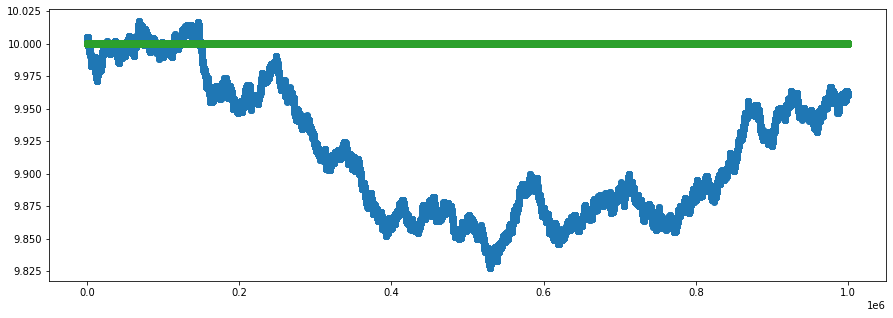

In [81]:
walk = np.zeros(int(1e6))
walk[0] = 10
walk_p = np.zeros(int(1e6))
walk_p[0] = 10
walk_mr = np.zeros(int(1e6))
walk_mr[0] = 10

for i in range(1,int(1e6)):
    # not mean reverting
    walk[i] = walk[i-1] + walk[i-1]*np.random.normal(scale=0.00001)

    # equivalent to log normal approach
    walk_p[i] = walk_p[0]*np.exp(-0.5*(0.00001**2)*np.random.normal(scale=np.sqrt(i)))

    # mean reverting
    walk_mr[i] = walk_mr[i-1] + 0.5*(10-walk_mr[i-1]) + walk_mr[i-1]*np.random.normal(scale=0.00001)

plt.figure(figsize=(15,5))
plt.plot(walk,'o-')
plt.plot(walk_p,'o-')
plt.plot(walk_mr,'o-')

print(np.mean(walk),np.var(walk), np.max(walk), np.min(walk))
print(np.mean(np.log(walk)),np.var(np.log(walk)), np.max(np.log(walk)), np.min(np.log(walk)))
print(np.mean(np.log(walk_p)),np.var(np.log(walk_p)), np.max(np.log(walk_p)), np.min(np.log(walk_p)))
print(np.mean(np.log(walk_mr)),np.var(np.log(walk_mr)), np.max(np.log(walk_mr)), np.min(np.log(walk_mr)))


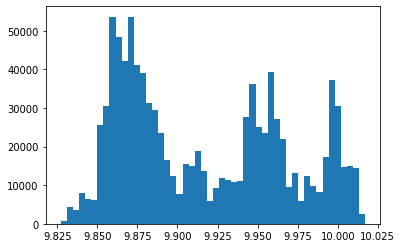

In [82]:
bin  = plt.hist(walk, bins=50)


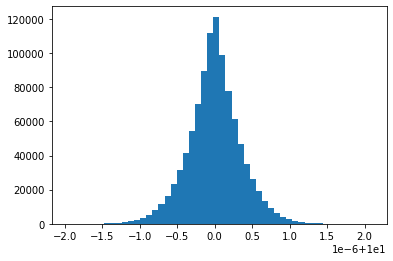

In [83]:
bin  = plt.hist(walk_p, bins=50)


In [71]:
walk_p

array([1.00000000e+01, 1.18901736e+01, 8.32428711e+00, ...,
       7.11174097e+05, 2.94536566e-16, 7.11797006e+75])

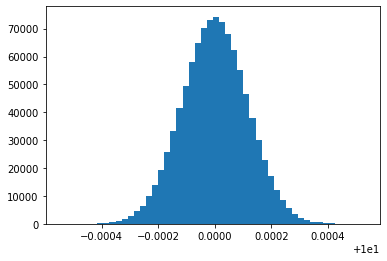

In [84]:
bin  = plt.hist(walk_mr, bins=50)

# Analysis beta init issue

In [1]:
import shocks as sh
from network import ClassNetwork
import numpy as np

In [2]:
network = ClassNetwork(
    n_banks=3,
    alpha=0.01,
    beta_init=100,
    beta_reg=0.1,
    beta_star=0.1,
    gamma=0.03,
    collateral_value=1.0,
    initialization_method="constant",
    alpha_pareto=1.3,
    shocks_method="bilateral",
    shocks_law="normal",
    shocks_vol=0.01,
    result_location="./results/test/",
    min_repo_size=1e-10,
    )

network.banks

c:\Users\VictorLeCoz\OneDrive - Quant Decisions S.L\Documents\PhD\secured-inter-bank-network\network.py:569: RuntimeWarning: invalid value encountered in double_scalars
  np.sum(weighted_repo_maturity) / total_repo_amount
c:\Users\VictorLeCoz\OneDrive - Quant Decisions S.L\Documents\PhD\secured-inter-bank-network\network.py:727: RuntimeWarning: invalid value encountered in double_scalars
  self.single_trajectory["Repos av. maturity"][-1] = np.sum(


In [7]:
gamma = 0.5
1/(1-gamma) - 0.01

1.99

# cpu count

In [1]:
import os
os.cpu_count()

36

# non conservative shocks

In [5]:
import numpy as np
from matplotlib import pyplot as plt

In [6]:
def generate_non_conservative_shocks(deposits, initial_deposits, total_assets, law, vol):
    if law == "log-normal":
        std_control = np.sqrt(np.log(1.0 + vol**2.0))
        new_deposits = (
            np.random.lognormal(
                mean=-0.5 * std_control**2,
                sigma=std_control,
                size=len(deposits),
            )
            * deposits
        )
        shocks = new_deposits - deposits
    elif law == "normal":
        new_deposits = np.maximum(deposits + np.random.randn(len(deposits)) * vol, 0.0)
        shocks = new_deposits - deposits

    elif law == "normal-mean-reverting":
        mean_reversion = 1
        epsilon = np.random.normal(loc=0,scale=vol,size=len(deposits))
        shocks = mean_reversion * (initial_deposits-deposits) + epsilon*total_assets
    else:
        assert False, ""
    
    shocks = shocks -np.mean(shocks)
    return shocks

In [7]:
deposits = np.random.rand(int(50))*100
initial_deposits = np.random.rand(int(50))*100
total_assets = deposits
law = "normal-mean-reverting"
vol = 0.05
shocks = generate_non_conservative_shocks(deposits, initial_deposits, total_assets, law, vol)


(array([4., 5., 4., 2., 7., 6., 7., 8., 2., 5.]),
 array([-74.75353562, -60.36456496, -45.9755943 , -31.58662364,
        -17.19765299,  -2.80868233,  11.58028833,  25.96925899,
         40.35822965,  54.74720031,  69.13617097]),
 <BarContainer object of 10 artists>)

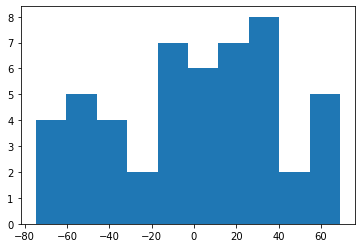

In [8]:
plt.hist(shocks)

26.983093114378335

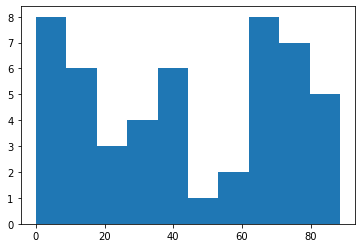

In [9]:
new_deposits = (deposits + shocks).clip(min=0)
bin = plt.hist(new_deposits)
np.sum(new_deposits)-np.sum(deposits)

## time serie dynamics generated by non conservative shocks
target: get total deposits / assets below 1e3 after 10 000 steps

In [8]:
import numpy as np
import pandas as pd
from scipy.stats import pareto
from matplotlib import pyplot as plt

In [9]:
def generate_non_conservative_shocks(
    deposits, initial_deposits, total_assets, law, vol
):
    if law == "log-normal":
        std_control = np.sqrt(np.log(1.0 + vol**2.0))
        new_deposits = (
            np.random.lognormal(
                mean=-0.5 * std_control**2,
                sigma=std_control,
                size=len(deposits),
            )
            * deposits
        )

    elif law == "normal":
        new_deposits = np.maximum(deposits + np.random.randn(len(deposits)) * vol, 0.0)

    elif law == "normal-mean-reverting":
        mean_reversion = vol
        epsilon = np.random.normal(loc=0, scale=vol, size=len(deposits))
        shocks = mean_reversion * (initial_deposits - deposits) + epsilon * total_assets

        # center the shocks
        shocks = shocks - np.mean(shocks)

        # clip the negative shocks to the deposits size
        new_deposits = (deposits + shocks).clip(min=0)

    else:
        assert False, ""

    shocks = new_deposits - deposits
    return shocks

In [10]:
# define parameters
# deposits = np.random.rand(int(50))*100
# initial_deposits = np.random.rand(int(50))*100
deposits = pareto.rvs(
    1.3,
    loc=0,
    scale=1,
    size=50,
    random_state=None,
    )* 40.0

initial_deposits = pareto.rvs(
    1.3,
    loc=0,
    scale=1,
    size=50,
    random_state=None,
    )* 40.0
total_assets = deposits
law ="normal-mean-reverting"
vol = 0.3

In [11]:
# run analysis

deposits_time_serie = pd.DataFrame(columns=range(50),index=range(30000))

for step in range(30000):
    shocks = generate_non_conservative_shocks(deposits, initial_deposits, deposits, law, vol)
    deposits = deposits + shocks
    deposits_time_serie.loc[step] = deposits
    


<AxesSubplot:>

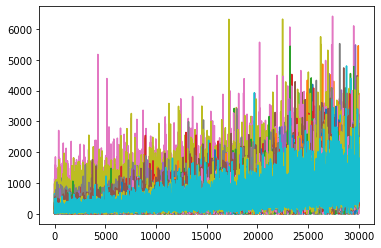

In [12]:
deposits_time_serie.plot(legend=False)

# gethostname

In [ ]:
from socket import gethostname
gethostname()

'srv006542.fr.cfm.fr'

# data frame test

In [ ]:
import pandas as pd
ind = pd.MultiIndex.from_tuples([], names=(u'one', u'two', u'three'))
df = pd.DataFrame(columns=['alpha', 'beta'], index=ind)
df.loc["bank a","transaction 1","time 56"] = [0.2,True]
df.loc["bank a","transaction 2","time 57"] = [0.3,True]
df.loc["bank b","transaction 2","time 57"] = [0.3,False]
df

alpha   beta
one    two           three                
bank a transaction 1 time 56    0.2   True
       transaction 2 time 57    0.3   True
bank b transaction 2 time 57    0.3  False

# dictionaries of arrays or dataframes

In [ ]:
import parameters as par
import numpy as np
dic_matrices = dict.fromkeys(par.matrices)
for key in dic_matrices.keys():
    dic_matrices[key] = np.zeros((3, 3)).copy()

# bug analysis

In [ ]:
import pickle

bank_id_on_balance_repos = pickle.load(open("./support/bank_id_on_balance_repos.pickle","rb"))

# df_reverse analysis

In [ ]:
import pandas as pd

df_reverse_repos = pd.read_csv("./results/single_run_saved/df_reverse_repos.csv",index_col=0)

In [ ]:
df_reverse_repos

,bank_id,trans_id,amount,start_step,tenor,status
owner_bank_id,,,,,,
0,414,0,2.251317e-01,71,2.0,False
0,193,0,2.177591e+00,72,24.0,False
0,414,1,0.000000e+00,71,2.0,False
0,278,0,2.047012e+00,73,3.0,False
0,474,0,1.914228e+00,73,5.0,False
...,...,...,...,...,...,...
499,431,164,3.558560e-01,2491,3.0,False
499,431,165,1.110223e-16,2494,NaN,True
499,431,166,1.131620e+00,2491,4.0,False
